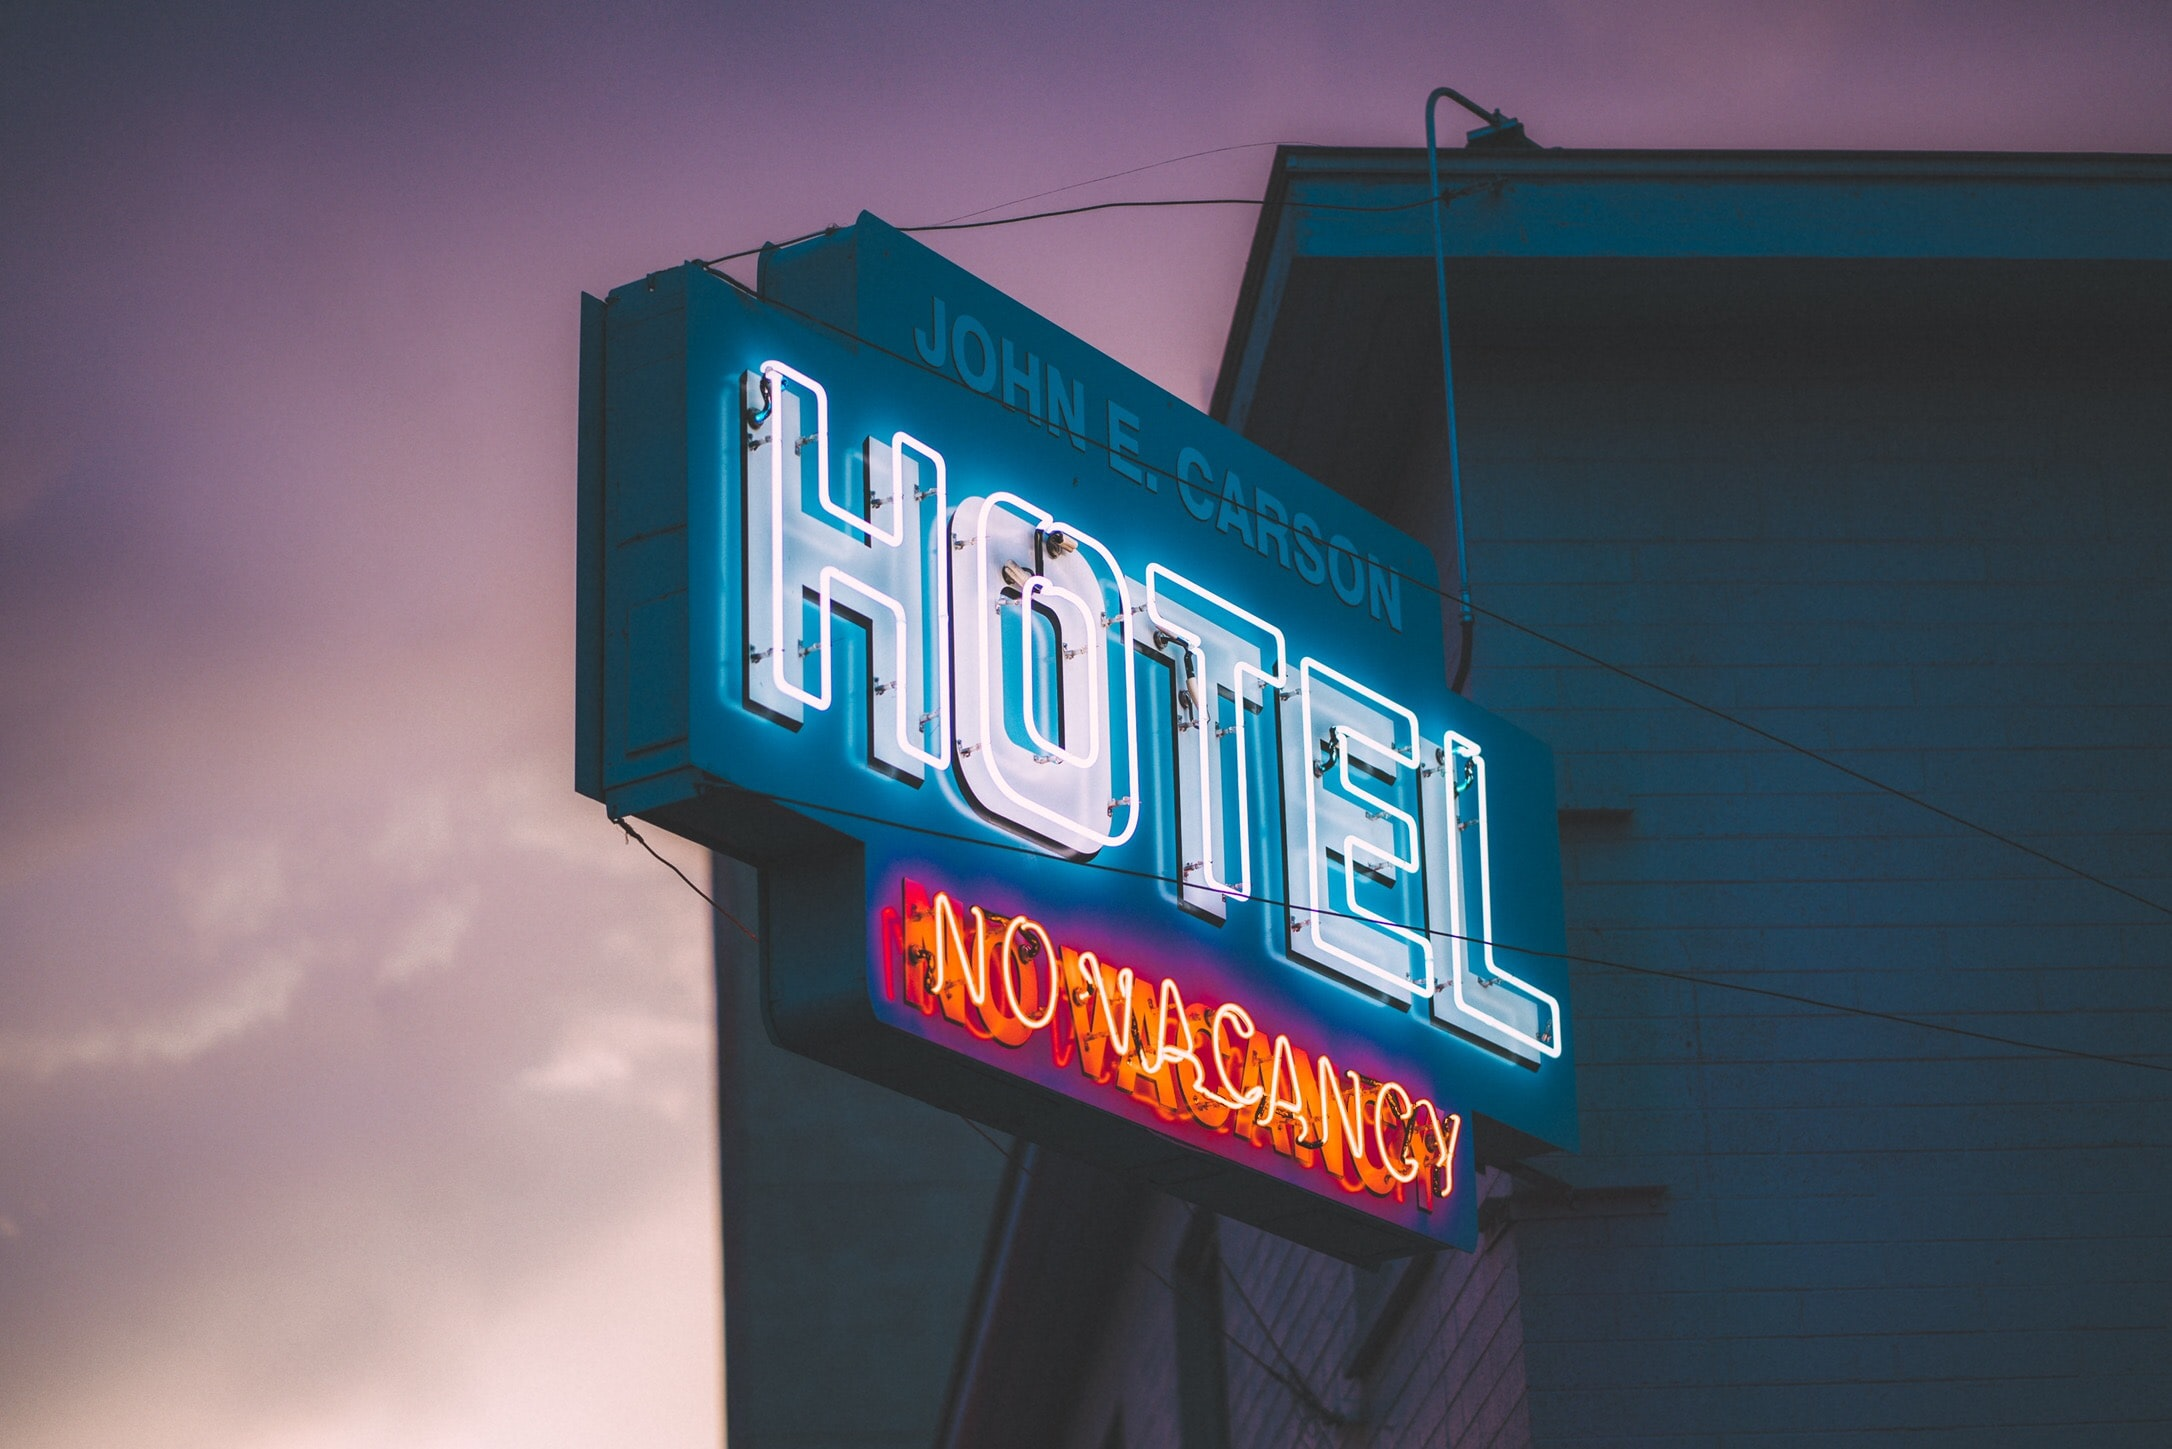

So You worked Hard whole year and kept your leaves to enjoy 15 days of your vacation in any destination. And found out it was your mistake as the hotels are pre booked or you have lot of crowd at the place you want to visit. Let us find out about it!!!

## **Libraries and Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
df = pd.read_csv("../input/hotel-booking-demand/hotel_bookings.csv")
pd.set_option('display.max_rows',20000, 'display.max_columns',100)
df.head()

## **__Data Treatment__**
1. Checking NA Values
2. Dropping Tables with less Information
3. Filling NA Values

Checking Percentage of NA Values

In [ ]:
(df.isnull().sum()/len(df))*100

As we can see 94.30% of Company column is null. So we are dropping it

In [ ]:
df = df.drop(['company'],axis=1)

In [ ]:
df.isnull().sum()

In [ ]:
sns.heatmap(df.isnull())
plt.title('NA Values in Heatmap')

Filling NA values

In [ ]:
df['country'] = df['country'].fillna (value='No Info')
df['agent'] = df['agent'].fillna (value=0.0)
df['children'] = df['children'].fillna (value=0.0)

Checking Booking of Hotels if canceled or not

In [ ]:
sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.title('Checking Booking of Hotels if canceled or not')

Checking Value in Children Column

In [ ]:
df['children'].value_counts()

Changing dataype of children float column to int

In [ ]:
df['children'] = df['children'].astype(int)

Adding a New Column

In [ ]:
#Adding a New Column
df['Guests'] = df['adults'] + df['children'] + df['babies']

In [ ]:
#Generally Family Member will be above 3
sns.countplot(x='Guests',hue='is_canceled',data=df)
plt.title('Family Member Should Be Above 3')

In [ ]:
df['meal'].nunique()

In [ ]:
#Calculating the value Percentage in a column.
(df['is_canceled'].value_counts()/len(df['is_canceled']))*100

In [ ]:
#Pie Chart for is_canceled
plt.rcParams['figure.figsize'] = (10,8)
labels = 'Not Cancelled', 'Cancelled'
sizes = [63,38]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.0f%%',
        shadow=True, startangle=90,center=(0, 0))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Reservation In Hotel Cancelled or Not')
plt.show()

In [ ]:
print(df['arrival_date_month'].nunique(),df['arrival_date_month'].unique())

Monthly Arrival of People

In [ ]:
#Monthly Arrival of People
plt.figure(figsize=(10,8))
sns.countplot(x='hotel',hue='arrival_date_month',data=df,)

Yearly Arrival of People

In [ ]:
#Yearly Arrival of People
plt.figure(figsize=(10,8))
sns.countplot(x='hotel',hue='arrival_date_year',data=df)

Checking Unique Countries Name

In [ ]:
print(df['country'].nunique(),df['country'].unique())

In [ ]:
df.head()

In [ ]:
carona_data = df.groupby(['hotel'])['meal'].sum().reset_index().sort_values('meal',ascending = True)

In [ ]:
df['Holiday Destination'] = df['country']
((df['country'].value_counts()/len(df['country']))*100)

Taking all the values in dictionary to divide the countries in Destination mostly preferred 

In [ ]:
#Taking all the values in dictionary to divide the countries in Destination mostly preferred 
x=((df['country'].value_counts()/len(df['country']))*100).to_dict()
x

In this Function I am converting Countries on the basis of most visited and favour destination.

In [ ]:
#In this Function I am converting Countries on the basis of most visited and favour destination.
for i in x:
    z = x.get(i,0)
    key= str(i)
    if z >= 10:
        df.loc[df['Holiday Destination'] == i, 'Holiday Destination'] = 'Excellent Destination'
    elif z >=1 and z<10:
        df.loc[df['Holiday Destination'] == i, 'Holiday Destination'] ='Famous Destination'
    elif z >=0.01 and z<1:
        df.loc[df['Holiday Destination'] == i, 'Holiday Destination'] ='Best Destination'
    elif z>=0.001 and z<0.01:
        df.loc[df['Holiday Destination'] == i, 'Holiday Destination'] ='Good Destination'
    else:
        df.loc[df['Holiday Destination'] == i, 'Holiday Destination']='Considerable Destination'

In [ ]:
df.head()

Holiday Destination and preferred Hotels

In [ ]:
#Holiday Destination and preferred Hotels.
plt.figure(figsize=(10,8))
sns.countplot(x='hotel',hue='Holiday Destination',data=df)

Market Segment and their preferred Holiday Destination

In [ ]:
#Market Segment and their preferred Holiday Destination
plt.figure(figsize=(10,8))
sns.countplot(x='market_segment',hue='Holiday Destination',data=df)

Checking for repeated guest preferring Holiday Destination

In [ ]:
#Checking for repeated guest preferring Holiday Destination.
plt.figure(figsize=(10,8))
sns.countplot(x='is_repeated_guest',hue='Holiday Destination',data=df)

Reserved Room Type during Holiday Destination

In [ ]:
#Reserved Room Type during Holiday Destination
plt.figure(figsize=(10,8))
sns.countplot(x='reserved_room_type',hue='Holiday Destination',data=df)

Guests preferring Holiday Destination

In [ ]:
#Guests preferring Holiday Destination
plt.figure(figsize=(10,8))
sns.countplot(x='Guests',hue='Holiday Destination',data=df)

In [ ]:
df_Zero = df[df['is_canceled']==0]
df_One = df[df['is_canceled']==1]

In [ ]:
#Checking For Imbalanced Dataset
print(len(df),len(df_Zero),((len(df_Zero)/len(df))*100),len(df_One),((len(df_One)/len(df))*100),len(df_Zero)+len(df_One))

## LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df['hotel'] = labelEncoder_X.fit_transform(df['hotel'])
df['meal'] = labelEncoder_X.fit_transform(df['meal'])
df['country'] = labelEncoder_X.fit_transform(df['country'])
df['arrival_date_month'] = labelEncoder_X.fit_transform(df['arrival_date_month'])
df['market_segment'] = labelEncoder_X.fit_transform(df['market_segment'])
df['distribution_channel'] = labelEncoder_X.fit_transform(df['distribution_channel'])
df['reserved_room_type'] = labelEncoder_X.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = labelEncoder_X.fit_transform(df['assigned_room_type'])
df['deposit_type'] = labelEncoder_X.fit_transform(df['deposit_type'])
df['customer_type'] = labelEncoder_X.fit_transform(df['customer_type'])
df['reservation_status'] = labelEncoder_X.fit_transform(df['reservation_status'])
df['reservation_status_date'] = labelEncoder_X.fit_transform(df['reservation_status_date'])
df['Holiday Destination'] = labelEncoder_X.fit_transform(df['Holiday Destination'])

In [ ]:
y=df['is_canceled']
X=df.drop(['is_canceled','reservation_status','adults','children','babies','previous_cancellations','previous_bookings_not_canceled'],axis=1)

## Trainig

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Scaling X_test and X_train

In [ ]:
#Scaling X_test and X_train
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

## Logistic Regression 

In [ ]:
#Using Logistic Regression 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print("Accuracy =",accuracy_score(y_test,y_pred))
print("Precision =",precision_score(y_test,y_pred))
print("Recall =",recall_score(y_test,y_pred))
print("F1 Score =",f1_score(y_test,y_pred))

## **Decision Forest**

In [ ]:
#Using Decison Tree 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(confusion_matrix(y_test,predictions))
print("Accuracy =",accuracy_score(y_test,predictions))
print("Precision =",precision_score(y_test,predictions))
print("Recall =",recall_score(y_test,predictions))
print("F1 Score =",f1_score(y_test,predictions))

## **Random Forest**

In [ ]:
#Using Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc__pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc__pred))
print("Accuracy =",accuracy_score(y_test,rfc__pred))
print("Precision =",precision_score(y_test,rfc__pred))
print("Recall =",recall_score(y_test,rfc__pred))
print("F1 Score =",f1_score(y_test,rfc__pred))

__IF ANY SUGGESTION.Kindly Let Me Know__